In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

<p> Load the CIFAR-10 dataset x_train and x_test of array shape (50000, 32, 32, 3) and (10000, 32, 32, 3) and y_train and y_test (50000, 1) and (10000, 1)

In [15]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [16]:
NUM_CLASSES = 10

In [17]:
x_train[0].shape

(32, 32, 3)

In [18]:
y_train[0]

array([6], dtype=uint8)

<p> Scaling the pixel values such that it lies between 0 and 1

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

<p>One hot encoding done making the single class to the number of classes making the initial data of (50000, 1) into (50000, 10)

In [20]:
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [22]:
from tensorflow.keras import layers, models

<p> Building the MLP using a sequential model

In [23]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(10, activation='softmax')
])

<p> Building the MLP using Functional API

In [24]:
input_layer = layers.Input(shape=(32,32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units = 200, activation="relu")(x)
x = layers.Dense(units = 150, activation = "relu")(x)
output_layer = layers.Dense(units = 10, activation ="softmax")(x)
model = models.Model(input_layer, output_layer)

<p> For the number of parameters calculated in each layer <br>
for dense_3 200 * (3072+1) = 614600

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras import optimizers

In [29]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train, batch_size=64, epochs=50, shuffle=True)

Epoch 1/50
782/782 [==============================] - 3s 4ms/step - loss: 1.3021 - accuracy: 0.5381
Epoch 2/50
782/782 [==============================] - 3s 3ms/step - loss: 1.2890 - accuracy: 0.5422
Epoch 3/50
782/782 [==============================] - 3s 3ms/step - loss: 1.2795 - accuracy: 0.5425
Epoch 4/50
782/782 [==============================] - 3s 3ms/step - loss: 1.2726 - accuracy: 0.5475
Epoch 5/50
782/782 [==============================] - 2s 3ms/step - loss: 1.2592 - accuracy: 0.5540
Epoch 6/50
782/782 [==============================] - 3s 3ms/step - loss: 1.2506 - accuracy: 0.5565
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.2414 - accuracy: 0.5604
Epoch 8/50
782/782 [==============================] - 3s 3ms/step - loss: 1.2284 - accuracy: 0.5635
Epoch 9/50
782/782 [==============================] - 3s 3ms/step - loss: 1.2222 - accuracy: 0.5656
Epoch 10/50
782/782 [==============================] - 2s 3ms/step - loss: 1.2109 - accuracy: 0.5712

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4822 - accuracy: 0.5143


[1.4821521043777466, 0.5142999887466431]

In [34]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'house', 'ship', 'truck'])
preds = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [39]:
preds[0]

array([0.0089642 , 0.03080015, 0.09671779, 0.31215233, 0.4111091 ,
       0.07117026, 0.01009717, 0.00357863, 0.04720144, 0.00820898],
      dtype=float32)

axis = -1 means that the argmax will see the second dimenstion which contains the softmax of prob of classes

In [37]:
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

Displaying the predictions

In [40]:
import matplotlib.pyplot as plt

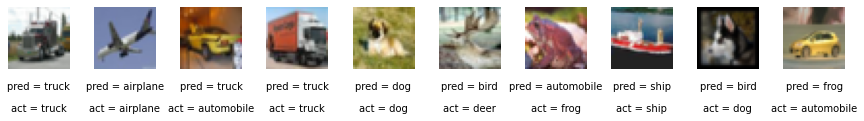

In [50]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)


fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=1, wspace=0.4)


for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize= 10, ha="center", transform = ax.transAxes)
    ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize= 10, ha="center", transform = ax.transAxes)
    ax.imshow(img)